<a href="https://colab.research.google.com/github/saptarshidatta96/DigitRecognizerCNN/blob/master/Digit_recognizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

sns.set(style='white', context='notebook', palette='deep')

#Load the data

In [23]:
train = pd.read_csv('/content/gdrive/My Drive/digit-recognizer/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/digit-recognizer/test.csv')

print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [24]:
Y_train = train['label']
X_train =train.drop(labels = ['label'], axis = 1)

#Checking the distribution of the train data

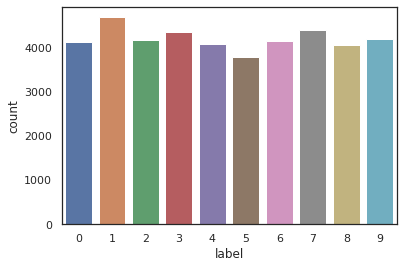

In [25]:
sns.countplot(Y_train)

#Testing for Null and Missing values

In [26]:
X_train.isnull().any()

pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 784, dtype: bool

In [27]:
test.isnull().any()

pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 784, dtype: bool

#Normalize the Data

In [28]:
x_train = X_train / 255
test = test / 255

#Reshape

In [29]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

#Label Encoding

In [30]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 10)

#Split the Training into Training/Test Set

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

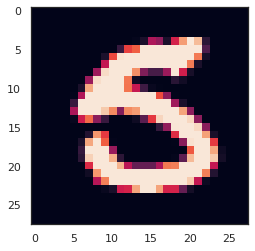

In [32]:
g = plt.imshow(X_train[4][:,:,0])

#CNN Model

In [33]:
model= tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)),
     tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2, 2),
     tf.keras.layers.Dropout(.25),
     tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')]
)

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

Without Data augmentation, Validation accuracy = 98.98%

In [37]:
model.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=100, epochs=24, verbose=2)

Epoch 1/24
378/378 - 6s - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0452 - val_accuracy: 0.9874
Epoch 2/24
378/378 - 6s - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0432 - val_accuracy: 0.9860
Epoch 3/24
378/378 - 6s - loss: 0.0237 - accuracy: 0.9922 - val_loss: 0.0425 - val_accuracy: 0.9893
Epoch 4/24
378/378 - 6s - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0449 - val_accuracy: 0.9883
Epoch 5/24
378/378 - 6s - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.0398 - val_accuracy: 0.9893
Epoch 6/24
378/378 - 6s - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0441 - val_accuracy: 0.9883
Epoch 7/24
378/378 - 6s - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0463 - val_accuracy: 0.9871
Epoch 8/24
378/378 - 6s - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0586 - val_accuracy: 0.9879
Epoch 9/24
378/378 - 6s - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0538 - val_accuracy: 0.9890
Epoch 10/24
378/378 - 6s - loss: 0.0168 - accuracy: 0.9949 - val_loss: 0.0499 - val_accuracy: 0.9893

In [38]:
model.save('/content/gdrive/My Drive/digit-recognizer/digit_recognizer_trial_model.h5')

Confusion Matrix

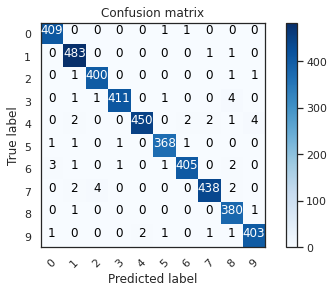

In [39]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1)   
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [40]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [41]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)